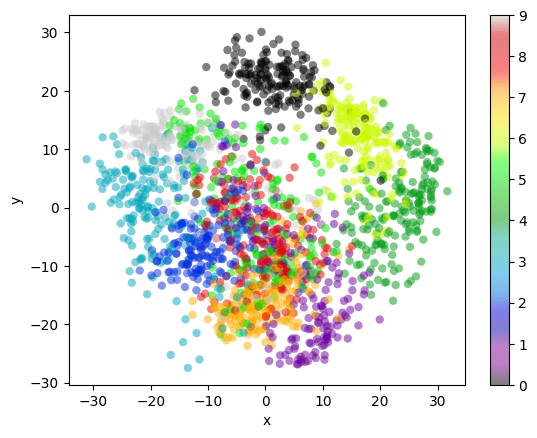

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = np.loadtxt(os.path.join('./dataset/','digits.csv'), delimiter=',')
digits = digits[:, 0:64]

# PCA function that must be made from zero
projected = PCA(2).fit_transform(digits.data)

plt.scatter(projected[:,0], projected[:,1],
            c=load_digits().target, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

In [24]:
# Inizializzazione di K centroidi casuali d'esempio dalla matrice X
def init_rand_centroids(K,X):
    
    m,n = np.shape(X)
    centroids = np.empty((K,n))

    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))]

    return centroids

In [25]:
# Calcolo della distanza euclidea
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [26]:
# Trova e restituisce l'indice del centroide più vicino di un vettore di X
def closest_centroid(x, centroids, K):
    
    distances = np.empty(K)

    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)

    return np.argmin(distances)

In [27]:
# Restituisce una matrice di indici di cluster per tutti i campioni di dati
def create_clusters(centroids, K, X):
    
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
        
    return cluster_idx

In [28]:
# Calcolo della media dei nuovi centroidi dei cluster
def means(cluster_idx, K, X):
    
    _, n = np.shape(X)
    centroids = np.empty((K, n))

    for i in range(K):
        points = X[cluster_idx == i] # Raggruppa i punti per il cluster i
        centroids[i] = np.mean(points, axis=0) # Calcolo media dei punti

    return centroids

In [29]:
# Calcolo del K-means e dei cluster finali
def K_means(K, X, max_iterations = 500):
    
    centroids = init_rand_centroids(K, X)
    #print(f"initial centroids: {centroids}")

    # Loop fino a max_iterations o avviene un convergenza
    for _ in range(max_iterations):
        
        clusters = create_clusters(centroids, K, X)
        prev_centroids = centroids                          
        
        centroids = means(clusters, K, X)
        
        diff = prev_centroids - centroids

        if not diff.any():
            return clusters

    return clusters

In [30]:
digits = np.loadtxt(os.path.join('./dataset/','digits.csv'), delimiter=',')

#X,Y = datasets.make_blobs()

X = projected
Y = digits[:,64]

Y_preds = K_means(10, X)
print(Y_preds)

[5. 8. 2. ... 1. 3. 3.]


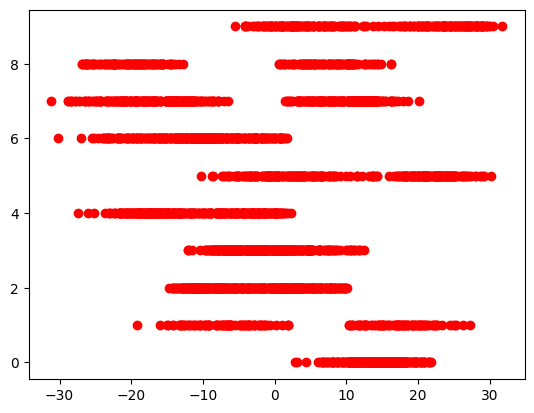

In [31]:
plt.plot(X,Y_preds,"ro")

#plt.scatter(X, Y_preds, edgecolor='none', alpha=0.5, cmap=plt.colormaps["nipy_spectral"])
            
#plt.xlabel('x')
#plt.ylabel('y')
#plt.colorbar()
